可视化卷积
===

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision as tv

import ELib.pyn.cnn.functions as epcf
import ELib.pyn.cnn.python_layer as epcl

class Visualization(object):
    def __init__(self, imagepath, layers=[]):
        self.img_path = imagepath
        self.layers = layers

    def _process_image_(self):
        img = cv2.imread(self.img_path)
        img = epcf.preprocess_image(img)
        img = self.transfer_image(img)
        return img

    def _get_feature_(self, selected_layers):
        input = self._process_image_()

        x = input
        for index, layer in enumerate(self.layers):
            x = layer(x)
            if (index == selected_layers):
                return x

    def transfer_image(self, image):
        return image

    def feature_to_numpy(self, features):
        pass

    def save_feature_to_img(self, selected_layers):
        features = self._get_feature_(selected_layers)

        feature = self.feature_to_numpy(features)

        feature = 1.0 / (1 + np.exp(-1 * feature))

        feature = np.round(feature * 255)
        return feature


class PytorchVisualization(Visualization):
    def __init__(self, imagepath, layers):
        super(PytorchVisualization, self).__init__(imagepath, layers)

    def transfer_image(self, image):
        return torch.autograd.Variable(torch.FloatTensor(image))

    def feature_to_numpy(self, features):
        feature = features[:, 0, :, :]
        feature = feature.view(feature.shape[1], feature.shape[2])
        feature = feature.data.numpy()

        return feature


class PythonVisualization(Visualization):
    def __init__(self, imagepath, layers):
        super(PythonVisualization, self).__init__(imagepath, layers)

    def transfer_image(self, image):
        return image.transpose((0, 2, 3, 1))

    def feature_to_numpy(self, features):
        feature = features[:, :, :, 0]
        feature = np.reshape(feature, newshape=(feature.shape[1], feature.shape[2]))

        return feature

Pytorch卷积可视化

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

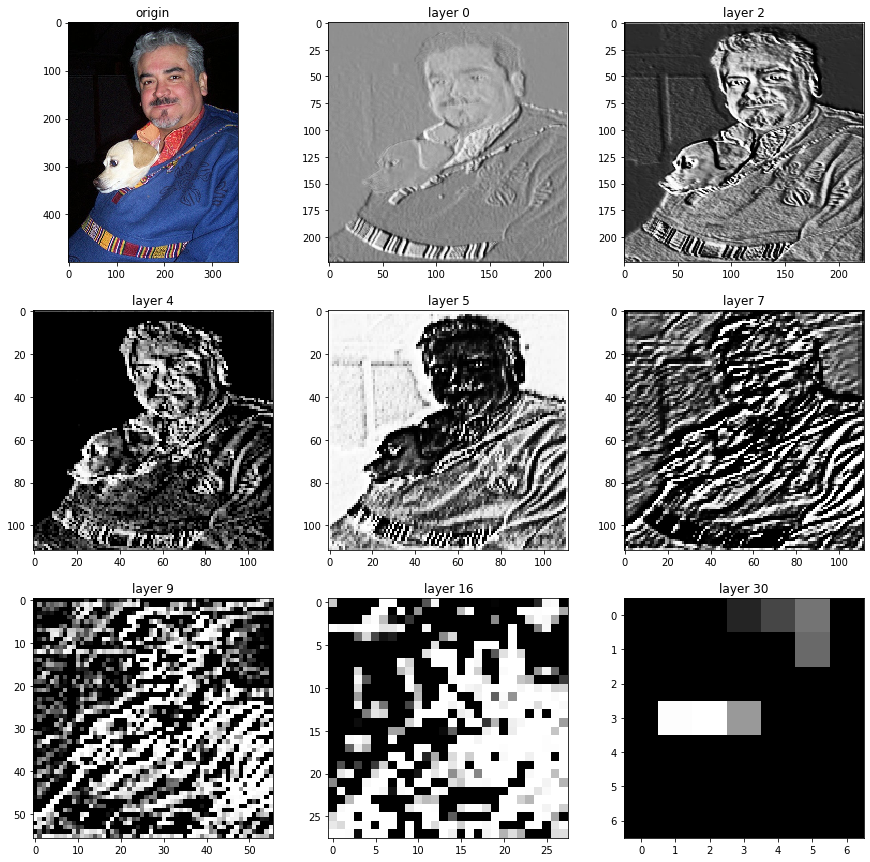

In [6]:
imagePath = "../Results/03/01/ConvVisible01.jpg"
models = tv.models.vgg16(pretrained=True).features
print(models)
myClass=PytorchVisualization(imagePath, layers=models)
layers = [-1, 0, 2, 4, 5, 7,9,16, 30]
plt.figure(figsize=(15,15), facecolor='w')
image_BGR = cv2.imread(imagePath)
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
for index, layer in enumerate(layers):
    if layer == -1:
        plt.subplot(3,3,index+1)
        plt.title('origin')
        plt.imshow(image_RGB)
    else:
        features = myClass.save_feature_to_img(layer)
        plt.subplot(3,3,index+1)
        plt.title('layer %d' % layer)
        plt.imshow(features,cmap='gray')
plt.show()

Python卷积可视化

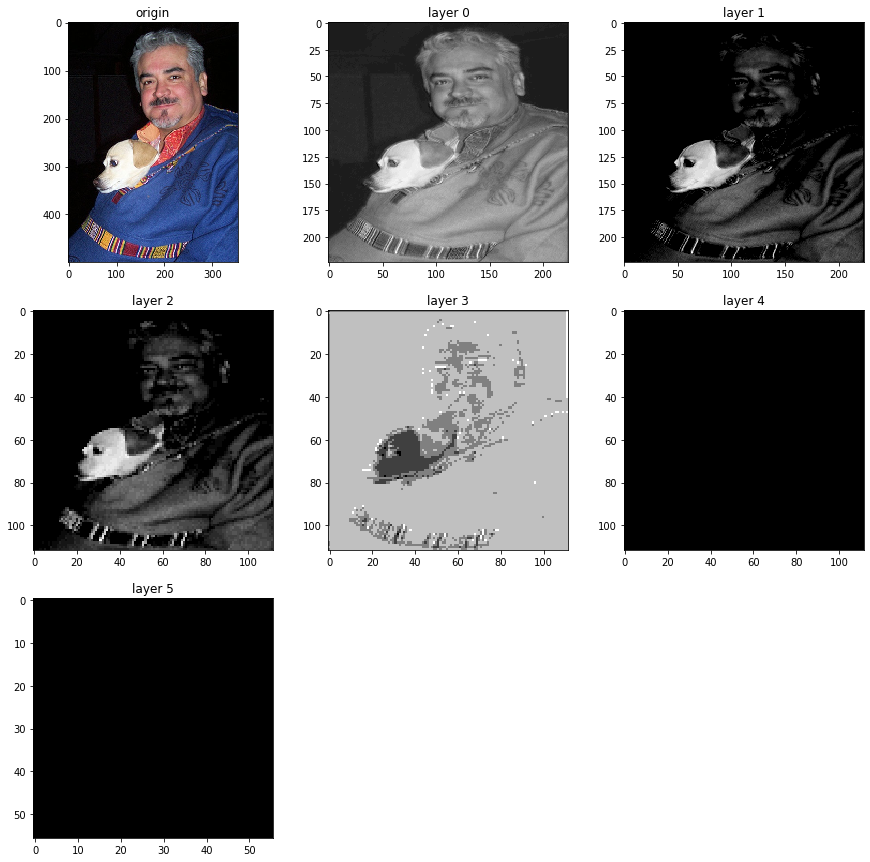

In [4]:
imagePath = "../Results/03/01/ConvVisible01.jpg"
models = [epcl.Conv2D(3, 64, 3, 1, 'SAME'),
              epcl.ReLU(),
              epcl.MaxPooling2D(ksize=2, stride=2),
              epcl.Conv2D(64, 32, 3, 1, 'SAME'),
              epcl.ReLU(),
              epcl.MaxPooling2D(ksize=2, stride=2)
              ]
myClass=PythonVisualization(imagePath, layers=models)
layers = [-1, 0, 1, 2, 3, 4, 5]
plt.figure(figsize=(15,15), facecolor='w')
image_BGR = cv2.imread(imagePath)
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
for index, layer in enumerate(layers):
    if layer == -1:
        plt.subplot(3,3,index+1)
        plt.title('origin')
        plt.imshow(image_RGB)
    else:
        features = myClass.save_feature_to_img(layer)
        plt.subplot(3,3,index+1)
        plt.title('layer %d' % layer)
        plt.imshow(features,cmap='gray')
plt.show()

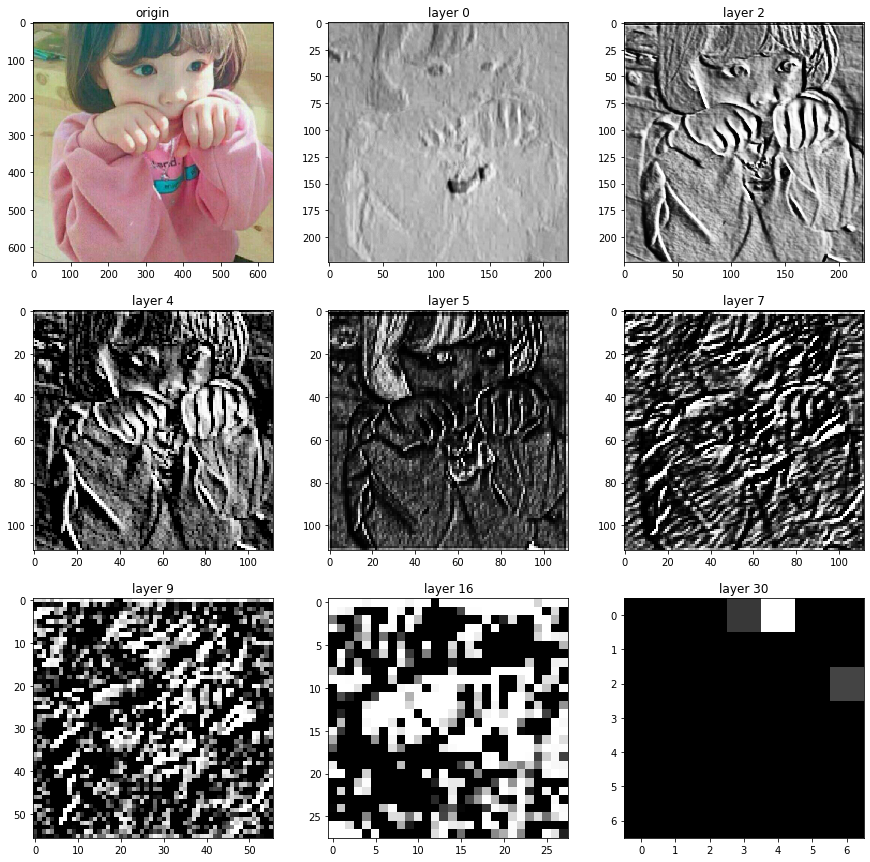

In [5]:
imagePath = "../Results/03/01/ConvVisible02.jpg"
models = tv.models.vgg16(pretrained=True).features
myClass=PytorchVisualization(imagePath, layers=models)
layers = [-1, 0, 2, 4, 5, 7,9,16, 30]
plt.figure(figsize=(15,15), facecolor='w')
image_BGR = cv2.imread(imagePath)
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
for index, layer in enumerate(layers):
    if layer == -1:
        plt.subplot(3,3,index+1)
        plt.title('origin')
        plt.imshow(image_RGB)
    else:
        features = myClass.save_feature_to_img(layer)
        plt.subplot(3,3,index+1)
        plt.title('layer %d' % layer)
        plt.imshow(features,cmap='gray')
plt.show()

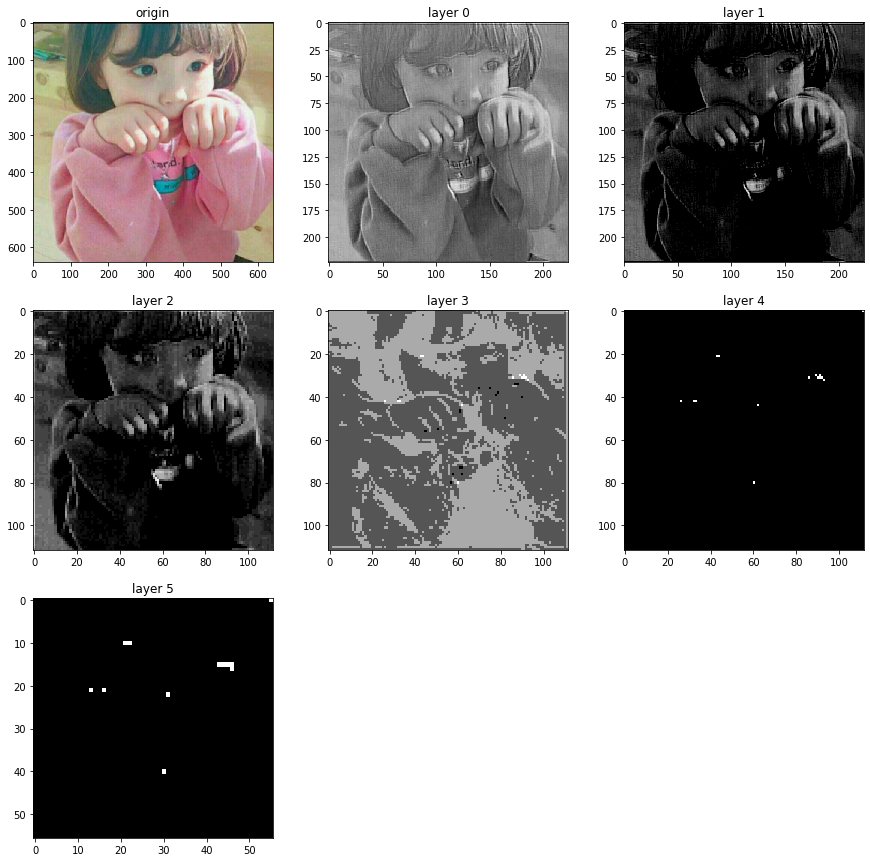

In [6]:
imagePath = "../Results/03/01/ConvVisible02.jpg"
models = [epcl.Conv2D(3, 64, 3, 1, 'SAME'),
              epcl.ReLU(),
              epcl.MaxPooling2D(ksize=2, stride=2),
              epcl.Conv2D(64, 32, 3, 1, 'SAME'),
              epcl.ReLU(),
              epcl.MaxPooling2D(ksize=2, stride=2)
              ]
myClass=PythonVisualization(imagePath, layers=models)
layers = [-1, 0, 1, 2, 3, 4, 5]
plt.figure(figsize=(15,15), facecolor='w')
image_BGR = cv2.imread(imagePath)
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
for index, layer in enumerate(layers):
    if layer == -1:
        plt.subplot(3,3,index+1)
        plt.title('origin')
        plt.imshow(image_RGB)
    else:
        features = myClass.save_feature_to_img(layer)
        plt.subplot(3,3,index+1)
        plt.title('layer %d' % layer)
        plt.imshow(features,cmap='gray')
plt.show()